# Slave Trade Data Analysis

In [127]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Importing and tidying data

In [128]:
# import the data set
# downloaded from https://slavevoyages.org/voyage/downloads#the-trans-atlantic-slave-trade-database/1/en/

trade_raw = pd.read_csv('SlaveTrade_2016.csv')



/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (51,81,87,148,149,178,180,260,262,264,278) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# explore
# list(trade_raw.columns)

# trade['route'].unique()

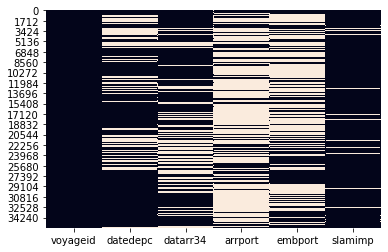

In [147]:
# select the most interesting columns
keep_cols = ['voyageid',     # unique id for voyage
             'datedepc',     # year departed
             'datarr34',    # year arrived
             'arrport',      # where ship arrived -- unfortunately I can't access the keys!
             'embport',      # where ship embarked on journey
             'slamimp',      # imputed number of enslaved people on board
#             'jamcaspr'      # Sterling cash price (of slaves) in Jamaica -- Not enough data here tbh
            ]

# throw out all but these columns;
trade = trade_raw[keep_cols]

# original format encodes missing data as ' ' rather than NA; fix this
# https://stackoverflow.com/questions/54508137/check-if-pandas-dataframe-cell-contains-certain-string
trade = trade.replace(' ', np.nan)     

# trade.to_csv('testing_trade.csv')
# trade['datedepc'].unique()


# explore NaNs using seaborn heatmap
sns.heatmap(trade.isnull(),cbar=False)

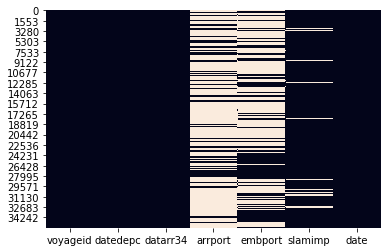

In [148]:
# how many voyages would we lose if we drop the ones that don't have a year recorded?
(trade['datedepc'].isna().sum() / trade['datedepc'].count() ) * 100
# answer: 36%... :/ not so great. let's find a different solution

# this is super hacky... I am adding the two types of date (date of dep, date of arr) together and then will round
# first must replace all NAs with 0
trade['datedepc'] = trade['datedepc'].replace(np.nan, '0')
trade['datedepc'] = trade['datedepc'].astype(str).astype(int)
trade['datarr34'] = trade['datarr34'].replace(np.nan, '0')
trade['datarr34'] = trade['datarr34'].astype(str).astype(int)

# I'm going to pick the higher date
# https://stackoverflow.com/questions/12169170/find-the-max-of-two-or-more-columns-with-pandas
trade['date'] = trade[['datedepc', 'datarr34']].max(axis = 1)

# check the range of this new column to see that there are reasonable year values everywhere
# trade['date'].unique()
# there are still some values of 0. let's cut those out.
# first check how much we would lose
# start by replacing 0 with NA again
trade['date'] = trade['date'].replace(0, np.nan)
(trade['date'].isna().sum() / trade['date'].count() ) * 100
# answer: 10%. Kind of a lot. But will have to live with it.

# dropping rows if specific column contains NA
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
trade = trade.dropna(subset=['date'])

sns.heatmap(trade.isnull(),cbar=False)
# now we have data everywhere!

* Outcome of mini data analysis: many of the ports are missing, so let's not focus on this

## Making graphs

What am I trying to compare?

- Year by year analysis.
- Plot the number of voyages vs. the number of enslaved people on each ship. This will give us a sense of how the slave trade went from small trips to a really big operation.